In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install emoji

     |████████████████████████████████| 133kB 4.9MB/s 


In [ ]:
!pip3 install emosent-py

  Created wheel for emosent-py: filename=emosent_py-0.1.6-cp37-none-any.whl size=28503 sha256=d1f613f42b04fb993a1e34f3d30cc5c3c1fcc95886215a91eedfaa331acb56e2
  Stored in directory: /root/.cache/pip/wheels/46/32/3c/2e21c3622b77cdc89a38a711240588ac3cf9b8e805eed0f6e1
Successfully built emosent-py


In [ ]:
!pip install sastrawi

     |████████████████████████████████| 215kB 6.5MB/s 


In [ ]:
!pip install nltk

In [ ]:
#import library yang dibutuhkan
import pandas as pd
import re
import json
import emoji
import nltk
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from emosent import get_emoji_sentiment_rank
from emoji import UNICODE_EMOJI
import regex
from collections import Counter

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_factory = StopWordRemoverFactory().get_stop_words()
dictionary = ArrayDictionary(stop_factory)
stopword_rmv = StopWordRemover(dictionary)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
list_stopwords = stopwords.words('indonesian')

In [ ]:
combined_slang = '/content/drive/MyDrive/skripsi/combined_slang_words.txt'
csv_file = '/content/drive/MyDrive/skripsi/Analisis Sentimen RUU Prakerja.csv'
label4 = '/content/drive/MyDrive/skripsi/labelling-4.csv'
label1 = '/content/drive/MyDrive/skripsi/labelling-1.csv'
label2 = '/content/drive/MyDrive/skripsi/labelling-2.csv'
label3 = '/content/drive/MyDrive/skripsi/labelling-3.csv'
label0= '/content/drive/MyDrive/skripsi/labelled.csv'

In [ ]:
data = pd.read_csv(csv_file)

In [ ]:
labelled_data1 = pd.read_csv(label1)
labelled_data2 = pd.read_csv(label2)
labelled_data3 = pd.read_csv(label3)
labelled_data0 = pd.read_csv(label0)

In [ ]:
labelled_data2

,Comment,UserName,Kelas sentimen,Kelas sarkasme,Unnamed: 4
0,Maju n berkembang,ulina.ulina.5283,1.0,-1.0,NaN
1,"Nggak usah pda ngoceh Mulu, lu nyobain sono ja...",jr.surz,1.0,-1.0,NaN
2,Siapa org yg membayar hutang negara??? Dan sam...,putri_090919,0.0,-1.0,NaN
3,❤️,maisunmuhammad,0.0,-1.0,NaN
4,Yang kaya makin kaya yang miskin makin miskin ...,zainal_arifin_04,1.0,-1.0,NaN
...,...,...,...,...,...
3135,Assalamu'allaikum Wr.Wb.Bpk.Presiden Jokowi 🙏 ...,lat_ifah1404,1.0,-1.0,NaN
3136,Kalo bener hoaxs yah nyatain dong di depan rak...,ndree_rasyid,-1.0,-1.0,NaN
3137,Hahahahahaha lucu juga ya tom&jerry nya maen l...,wong_asorr,-1.0,1.0,NaN
3138,DPR? COT,ega_s.a,-1.0,-1.0,NaN


In [ ]:
def labelling(data):
  for i in range(len(data)):
    sarkasme_label = [labelled_data1['Kelas sarkasme'][i], labelled_data2['Kelas sarkasme'][i], labelled_data3['Kelas sarkasme'][i], labelled_data0['Kelas sarkasme'][i], labelled_data4['Kelas sarkasme'][i]]
    sentimen_label = [labelled_data1['Kelas sentimen'][i], labelled_data2['Kelas sentimen'][i], labelled_data3['Kelas sentimen'][i], labelled_data0['Kelas sentimen'][i], labelled_data4['Kelas sarkasme'][i]]
    sentimen = max(sentimen_label,key=sentimen_label.count)
    sarkasme = max(sarkasme_label,key=sarkasme_label.count)
    data['Kelas sentimen'][i] = sentimen
    data['Kelas sarkasme'][i] = sarkasme
  print(data)
  return data  

In [ ]:
labelling(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


                                                Comment  ... Kelas sarkasme
0                                     Maju n berkembang  ...           -1.0
1     Nggak usah pda ngoceh Mulu, lu nyobain sono ja...  ...           -1.0
2     Siapa org yg membayar hutang negara??? Dan sam...  ...           -1.0
3                                                    ❤️  ...           -1.0
4     Yang kaya makin kaya yang miskin makin miskin ...  ...           -1.0
...                                                 ...  ...            ...
3135  Assalamu'allaikum Wr.Wb.Bpk.Presiden Jokowi 🙏 ...  ...           -1.0
3136  Kalo bener hoaxs yah nyatain dong di depan rak...  ...           -1.0
3137  Hahahahahaha lucu juga ya tom&jerry nya maen l...  ...           -1.0
3138                                           DPR? COT  ...           -1.0
3139      Mudah buat para penganguran termasuk TKA cina  ...           -1.0

[3140 rows x 4 columns]


,Comment,UserName,Kelas sentimen,Kelas sarkasme
0,Maju n berkembang,ulina.ulina.5283,1.0,-1.0
1,"Nggak usah pda ngoceh Mulu, lu nyobain sono ja...",jr.surz,1.0,-1.0
2,Siapa org yg membayar hutang negara??? Dan sam...,putri_090919,0.0,-1.0
3,❤️,maisunmuhammad,0.0,-1.0
4,Yang kaya makin kaya yang miskin makin miskin ...,zainal_arifin_04,-1.0,-1.0
...,...,...,...,...
3135,Assalamu'allaikum Wr.Wb.Bpk.Presiden Jokowi 🙏 ...,lat_ifah1404,0.0,-1.0
3136,Kalo bener hoaxs yah nyatain dong di depan rak...,ndree_rasyid,0.0,-1.0
3137,Hahahahahaha lucu juga ya tom&jerry nya maen l...,wong_asorr,0.0,-1.0
3138,DPR? COT,ega_s.a,0.0,-1.0


In [ ]:
with open(combined_slang, 'r') as file:
    indo_slang = file.read()
    indo_slang = json.loads(indo_slang)

In [ ]:
labelled_data1['Kelas sentimen'][0]

1.0

In [ ]:
data.tail(10)

,Comment,UserName,Kelas sentimen,Kelas sarkasme
3130,Alhamdulillah...sehat terus ya bapak presidenk...,iik.wahyu.52,1.0,-1.0
3131,"Buka ruang diskusi dengan mahasiswa pak,,,,ada...",azwaralhasan,-1.0,-1.0
3132,@ejhoon_23,ayu_moding69,0.0,-1.0
3133,HALAH NGOPO,halo_gaeshh,0.0,-1.0
3134,KEMARIN CEBONG SEKARANG BEBEK,halo_gaeshh,0.0,-1.0
3135,Assalamu'allaikum Wr.Wb.Bpk.Presiden Jokowi 🙏 ...,lat_ifah1404,0.0,-1.0
3136,Kalo bener hoaxs yah nyatain dong di depan rak...,ndree_rasyid,0.0,-1.0
3137,Hahahahahaha lucu juga ya tom&jerry nya maen l...,wong_asorr,0.0,-1.0
3138,DPR? COT,ega_s.a,0.0,-1.0
3139,Mudah buat para penganguran termasuk TKA cina,bankzoel,0.0,-1.0


In [ ]:
data[(data['Kelas sentimen'] == 0) & (data['Kelas sarkasme'] == -1)]

60 | INFO | NumExpr defaulting to 2 threads.


,Comment,UserName,Kelas sentimen,Kelas sarkasme
2,Siapa org yg membayar hutang negara??? Dan sam...,putri_090919,0.0,-1.0
3,❤️,maisunmuhammad,0.0,-1.0
5,jahat nya sebagian oknum yg berpolitik yg sali...,hafizmuslim61,0.0,-1.0
7,😢😢😢😢,hafizmuslim61,0.0,-1.0
9,"Tumben nihh para artis"" gk nongol dikomen",horas.riowaldy_07,0.0,-1.0
...,...,...,...,...
3135,Assalamu'allaikum Wr.Wb.Bpk.Presiden Jokowi 🙏 ...,lat_ifah1404,0.0,-1.0
3136,Kalo bener hoaxs yah nyatain dong di depan rak...,ndree_rasyid,0.0,-1.0
3137,Hahahahahaha lucu juga ya tom&jerry nya maen l...,wong_asorr,0.0,-1.0
3138,DPR? COT,ega_s.a,0.0,-1.0


In [ ]:
data[(data['Kelas sentimen'] == 0) & (data['Kelas sarkasme'] == 1)]

,Comment,UserName,Kelas sentimen,Kelas sarkasme
38,Globalis cabang,yuandimas,0.0,1.0
56,"Di demo kabur, pemilu cari2 rakyat smpe ke lob...",bon7135,0.0,1.0
57,😂😂,rfr.9_,0.0,1.0
65,Gimana pakde sudah di tf brapa sama roschild &...,ulin_hidayat1,0.0,1.0
73,Dukung lah tiap tahun di untungin mulu dr riba...,ndin_muhammad,0.0,1.0
...,...,...,...,...
3085,PAKK RESHUFFLE PARA MENTERI🙏🌹,bgz.krzn788,0.0,1.0
3095,Keliatan capek pak. Mundur aja la wkwk,annisaalkahfii_,0.0,1.0
3100,Hoax pencitraan udah kgk laku😂😂,official_mitraresmitreninet,0.0,1.0
3115,Wkwkwkk ternyata benarr komentar nya di Filter...,rahmatn273,0.0,1.0


In [ ]:
data[(data['Kelas sentimen'] == 1) & (data['Kelas sarkasme'] == -1)]

,Comment,UserName,Kelas sentimen,Kelas sarkasme
0,Maju n berkembang,ulina.ulina.5283,1.0,-1.0
1,"Nggak usah pda ngoceh Mulu, lu nyobain sono ja...",jr.surz,1.0,-1.0
8,Silahkan saja pak Omnibuslaw cipta kerja di sa...,yadi.supriadi184,1.0,-1.0
12,Cocok biar bayak pekerjaan aparat,efan.18,1.0,-1.0
13,Sangat bagus dan tepat...keputusan yang di amb...,alvandominic,1.0,-1.0
...,...,...,...,...
3119,Mantap pak Jokowi presiden kesukaan saya,waruwuvans,1.0,-1.0
3120,"Saya bangga, indonesia punya bapak. Meski raky...",cobacariii,1.0,-1.0
3121,"Mau Bapak bagaimanapun, dari awal, dan di mata...",dito_s24,1.0,-1.0
3122,Bapak PRESIDEN yg secara Pribadi Saya Hormati.,garryrakasiwi,1.0,-1.0


In [ ]:
data[(data['Kelas sentimen'] == 1) & (data['Kelas sarkasme'] == 1)]

,Comment,UserName,Kelas sentimen,Kelas sarkasme
47,Pak sy belum dengar UU Omnibus lawnya bapak ud...,rudi.b.r,1.0,1.0
50,Nasabah terbaik pasti lah di support sama bank...,iilhmmmaul,1.0,1.0
54,Kaum bodoh yang menolak omnibuslow lu mau misk...,__miiiiiiiiin_,1.0,1.0
143,ikutin penguasa aja rakyat kecil bisa apa hhe.,bngsrr_,1.0,1.0
283,Untung pak jokowi udah 2 periode.. besok2 kalo...,van.limburg.stirum,1.0,1.0
377,Kalo kata pemerintah hoak ya hoak,mfaisalakbrr,1.0,1.0
397,"bapak saya percaya bapak, dan gak pernah mau k...",moccaronie,1.0,1.0
410,👍👍👍👍👍👍🖕🖕pak joko widodo,syifa.auliah.338,1.0,1.0
451,"Penanganan Halte cukup sigap dan tanggap, mesk...",syafra92,1.0,1.0
460,“Anjing menggonggong Kafilah berlalu..” Apapun...,febrian_amanda,1.0,1.0


In [ ]:
data[(data['Kelas sentimen'] == -1) & (data['Kelas sarkasme'] == -1)]

,Comment,UserName,Kelas sentimen,Kelas sarkasme
4,Yang kaya makin kaya yang miskin makin miskin ...,zainal_arifin_04,-1.0,-1.0
6,jahat nya sebagian politikus dia rela menjual ...,hafizmuslim61,-1.0,-1.0
17,Undang undag itu sakral.. knp tergesa gesa,paradisaku,-1.0,-1.0
20,IYa emng perlu UU omnibuslaw .. Tapi Tau ga pa...,tuan.duabelass_,-1.0,-1.0
21,"Pak kenapa yg di bantu Wira usaha yg kaya"" pak...",kurniania8341,-1.0,-1.0
...,...,...,...,...
3108,"Saya mau bertanya, kenapa bisa anggota dpr ada...",el.tamp24_,-1.0,-1.0
3118,"Pak, menurut bapak keadilan di negeri ini suda...",fadelfarhanff,-1.0,-1.0
3124,Bapak Presiden yg secara Pribadi Saya Hormati....,garryrakasiwi,-1.0,-1.0
3125,Banyak yg bilang yg nolak UU CK Krn malas baca...,ipung.12_,-1.0,-1.0


In [ ]:
data[(data['Kelas sentimen'] == -1) & (data['Kelas sarkasme'] == 1)]

,Comment,UserName,Kelas sentimen,Kelas sarkasme
19,pendapat masyarakat diabaikan?,ammarysrhd,-1.0,1.0
22,"Kerja, kerja, kerja, di kerjai pemerintah! Kas...",__poemforus,-1.0,1.0
37,PAKKK BAYAR UTANG NYAA KAPAN PAAKKK😂😂😂😂😂😂😂😂😂😂T...,afis_17._.10_,-1.0,1.0
45,Wwkkw orang anda sbg presiden udh baca isi sem...,suhufi_m,-1.0,1.0
51,"Wkwkw hebat, omongan world bank kok dipercaya,...",f1nd14,-1.0,1.0
...,...,...,...,...
3084,"Oke pak, klau hanya hoax knpa sdah di sahkan? ...",j_bolowantu28,-1.0,1.0
3099,"Tolong lah pak, dengar suara kami sebagai raky...",irvanchaerull,-1.0,1.0
3105,lalu ada apa dengan pengesahan RUU pada waktu ...,rental_mobil_zkproject,-1.0,1.0
3116,Rakyat ingin mengadu dengan cara unjuk rasa......,gueaja65,-1.0,1.0


In [ ]:
count_netral_nonsarkasme = len(data[(data['Kelas sentimen'] == 0) & (data['Kelas sarkasme'] == -1)])
count_netral_sarkasme = len(data[(data['Kelas sentimen'] == 0) & (data['Kelas sarkasme'] == 1)])
count_pos_nonsarkasme = len(data[(data['Kelas sentimen'] == 1) & (data['Kelas sarkasme'] == -1)])
count_pos_sarkasme = len(data[(data['Kelas sentimen'] == 1) & (data['Kelas sarkasme'] == 1)])
count_neg_nonsarkasme = len(data[(data['Kelas sentimen'] == -1) & (data['Kelas sarkasme'] == -1)])
count_neg_sarkasme = len(data[(data['Kelas sentimen'] == -1) & (data['Kelas sarkasme'] == 1)])

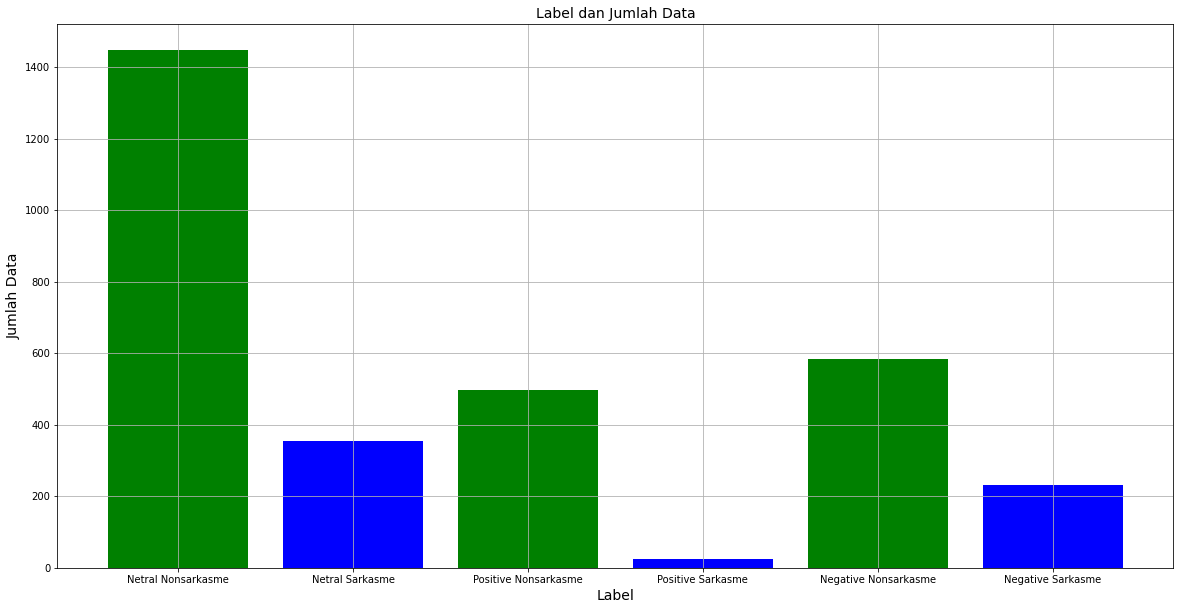

In [ ]:
labels = ['Netral Nonsarkasme','Netral Sarkasme','Positive Nonsarkasme','Positive Sarkasme','Negative Nonsarkasme', 'Negative Sarkasme']
labels_count = [count_netral_nonsarkasme,count_netral_sarkasme,count_pos_nonsarkasme,count_pos_sarkasme,count_neg_nonsarkasme,count_neg_sarkasme]

New_Colors = ['green','blue','green','blue','green','blue']
plt.figure(figsize=(20, 10))
plt.bar(labels, labels_count, color=New_Colors)
plt.title('Label dan Jumlah Data', fontsize=14)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Jumlah Data', fontsize=14)
plt.grid(True)
plt.show()

#Data Cleaning
#1. pengubahan emoji menjadi string
#2. pembersihan data dari hashtag, tag, url dan karakter non-alfabet
#3. Tokenizations
#4. Pengubahan kata gaul menjadi baku
#5. Penghapusan stopwords
#6. Stemming

# **Data Cleaning**

In [ ]:
def data_cleaning(text):
    lower_case = text.lower()
    hash_removal = re.sub(r"#\S+", "", lower_case)
    tag_removal = re.sub(r"@[A-Za-z0-9]+","", hash_removal)
    urls_removal = re.sub(r"http\S+", "", tag_removal)
    non_alphabet_removal = re.sub('[^a-zA-Z]', ' ', urls_removal)
    
    return non_alphabet_removal

In [ ]:
def slang_to_baku(tokenized_word):
    text = []
    for t in tokenized_word:
        if t in indo_slang.keys():
            t = indo_slang[t]
        text.append(t)
    return text

In [ ]:
slang_to_baku(['cot', 'semangat'])

['bacot', 'semangat']

In [ ]:
def emoji_to_string(text):
    text = emoji.demojize(text)
    return text

In [ ]:
emoji_to_string('Semangat pak Jokowi 💪,tetap berjuang demi Indo...')

'Semangat pak Jokowi :flexed_biceps:,tetap berjuang demi Indo...'

In [ ]:
def tokenize(text):
    text = nltk.tokenize.word_tokenize(text)
    return text

In [ ]:
def stopword_removal(words):
    new_words = ''
    for word in words:
      if word not in list_stopwords:
        new_words = new_words + ' ' + word
    return new_words

In [ ]:
def stemming(words):
    words = stemmer.stem(words)
    return words

In [ ]:
#emoji diubah menjadi string 
text = data['Comment'].apply(emoji_to_string)

In [ ]:
for i in range(11):
  print(text[i])

Maju n berkembang
Nggak usah pda ngoceh Mulu, lu nyobain sono jadi presiden, mampu nggak..?.
Siapa org yg membayar hutang negara??? Dan sampai kpn hutang negara itu terlunaskan??
:red_heart:
Yang kaya makin kaya yang miskin makin miskin itu udah takdir akhir zaman...... :face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy:
jahat nya sebagian oknum yg berpolitik yg saling menyalah kan dan menjatuh kan antara 1 dengan yg lain nya dan itu smua terjadi karna ada nya sumber api maka terbentuk nya asab dan tidak terjadi asap kalau tidak ada api maka dapat kita simpul kan dan garis bawahi tidak terjadi ny kerusuhan antara kedua belah pihak klaw di salah satu dari mereka merasa di rugikan bahkan dia merasa bukan saja diri nya yg di rugikan tetapi juga halayak atau pun masyarakat banyak dan itu lh yg terjadi sekarang ini lalu pertanyaan saya bagai mana indonesia maju kalau rakyat dan aparat pemerintah tidak mau bersatu.kita berp

In [ ]:
#membersihkan data dengan menghapus url, hashtag, non numerik dan menjadikan lowercase
text = text.apply(data_cleaning)

In [ ]:
#mengubah kalimat menjadi token
text = text.apply(tokenize)

In [ ]:
#mengubah kata-kata gaul menjadi baku
text = text.apply(slang_to_baku)

In [ ]:
#menghapus stopwords
text = text.apply(stopword_removal)

In [ ]:
text

0                                         maju berkembang
1                     ngoceh melulu nyobain sono presiden
2        orang membayar hutang negara hutang negara te...
3                                           redaksi heart
4        kaya kaya miskin miskin takdir zaman face wit...
                              ...                        
3135     assalamu allaikum wr wb presiden jokowi folde...
3136                     hoaxs yah nyatain rakyat mu demo
3137     hahahahahaha lucu iya tom jerry nya main lari...
3138                                            dpr bacot
3139                           mudah penganguran tka cina
Name: Comment, Length: 3140, dtype: object

In [ ]:
#mengubah menjadi kata dasar
text = text.apply(stemming)

In [ ]:
data.loc[:,'clean'] = text

In [ ]:
data['clean'].head(30)

0                                          maju kembang
1                   ngoceh melulu nyobain sono presiden
2         orang bayar hutang negara hutang negara lunas
3                                         redaksi heart
4     kaya kaya miskin miskin takdir zaman face with...
5     jahat nya oknum politik salah jatuh nya smua n...
6     jahat nya politikus rela jual harga nya murah ...
7       crying face crying face crying face crying face
8     silah omnibuslaw cipta kerja sahkan taappiiii ...
9                      tumben nihh artis nongol dikomen
10                                 face with open mouth
11      uu omnibus law perijinan imb perlu terima kasih
12                        cocok biar bayak kerja aparat
13    bagus putus ambil jadi indonesia maju sejahter...
14    aspirasi nya temu kasi mbok iya temu to jokowi...
15    lanjut clapping hands clapping hands clapping ...
16                                        redaksi heart
17                        undang undag sakral ge

# **Feature Extraction**

#feature extraction
#sentimen analisis: TF-IDF
#sarkasme: 
#1. TF-IDF
#2. sentimen related:
#2.1 jumlah sentimen emotikon positif dan negatif
#2.2 Jumlah sentimen kata positif dan negatif
#2.3 Selisih antar emotikon dengan nilai paling tinggi dan rendah
#2.4 Selisih antar kata dengan nilai paling tinggi dan rendah


#3. punctuation-related:
#3.1 jumlah tanda seru
#3.2 jumlah tanda tanya
#3.3 jumlah titik
#3.4 jumlah penggunaan kata dengan huruf kapital
#3.5 jumlah tanda petik
#3.6 jumlah pengulangan huruf berlebihan

#4. Lexycal and syntactic: jumlah pengulangan tertawa

In [ ]:
def count_emojis_sentiment(text):
  max = 0
  min = 0
  data = re.findall(r'[^\w\s,]', text)
  emoji_sentiment = 0
  emoji_contrast = 0
  for char in data:
    try:
      if char in UNICODE_EMOJI['en']:
        emoji_sentiment += get_emoji_sentiment_rank(char)['sentiment_score']
        if get_emoji_sentiment_rank(char)['sentiment_score'] > max:
          max = get_emoji_sentiment_rank(char)['sentiment_score']
        if get_emoji_sentiment_rank(char)['sentiment_score'] < min:
          min = get_emoji_sentiment_rank(char)['sentiment_score']
        emoji_contrast = max - min
    except:
      pass
  return emoji_sentiment, emoji_contrast

In [ ]:
#menghitung sentimen emoji dan kontras sentimen emoji dari masing-masing kalimat
#kontras sentimen yaitu selisih antara sentimen tertinggi dan terendah dalam suatu kalimat
emoji = data['Comment'].apply(count_emojis_sentiment)

In [ ]:
data['Emoji sentimen'] = [i for i,j in emoji]

In [ ]:
data['Emoji kontras'] = [j for i,j in emoji]

In [ ]:
negative_words = pd.read_csv('/content/drive/MyDrive/skripsi/negative.tsv',sep='\t')
negative_words.head()

,word,weight
0,putus tali gantung,-2
1,gelebah,-2
2,gobar hati,-2
3,tersentuh (perasaan),-1
4,isak,-5


In [ ]:
positive_words = pd.read_csv('/content/drive/MyDrive/skripsi/positive.tsv',sep='\t')
positive_words.head()

,word,weight
0,hai,3
1,merekam,2
2,ekstensif,3
3,paripurna,1
4,detail,2


In [ ]:
word_sentiment = pd.concat([negative_words, positive_words])

In [ ]:
word_sentiment = dict(word_sentiment.values)

In [ ]:
word_sentiment['hutang']

-5

In [ ]:
def count_sentiment(text):
  max = 0
  min = 0
  text_sentiment = 0
  text_contrast = 0
  for word in text.split():
    try:
      if word in word_sentiment:
        text_sentiment += word_sentiment[word]
        if word_sentiment[word] > max:
          max = word_sentiment[word]
        if word_sentiment[word] < min:
          min = word_sentiment[word]
        text_contrast = max - min
    except:
      pass
  return text_sentiment, text_contrast

In [ ]:
#menghitung sentimen dan kontras sentimen dari masing-masing kalimat
sentimen = data['clean'].apply(count_sentiment)

In [ ]:
sentimen

0        (3, 3)
1        (0, 6)
2       (-9, 6)
3        (0, 0)
4       (-6, 7)
         ...   
3135    (40, 8)
3136    (-3, 3)
3137     (3, 5)
3138     (3, 3)
3139     (4, 4)
Name: clean, Length: 3140, dtype: object

In [ ]:
data['Word sentimen'] = [i for i,j in sentimen]

In [ ]:
data['Word kontras'] = [j for i,j in sentimen]

In [ ]:
data.head(10)

,Comment,UserName,Kelas sentimen,Kelas sarkasme,clean,Emoji sentimen,Emoji kontras,Word sentimen,Word kontras
0,Maju n berkembang,ulina.ulina.5283,1.0,-1.0,maju kembang,0.000,0.000,3,3
1,"Nggak usah pda ngoceh Mulu, lu nyobain sono ja...",jr.surz,1.0,-1.0,ngoceh melulu nyobain sono presiden,0.000,0.000,0,6
2,Siapa org yg membayar hutang negara??? Dan sam...,putri_090919,0.0,-1.0,orang bayar hutang negara hutang negara lunas,0.000,0.000,-9,6
3,❤️,maisunmuhammad,0.0,-1.0,redaksi heart,0.746,0.746,0,0
4,Yang kaya makin kaya yang miskin makin miskin ...,zainal_arifin_04,-1.0,-1.0,kaya kaya miskin miskin takdir zaman face with...,1.105,0.221,-6,7
5,jahat nya sebagian oknum yg berpolitik yg sali...,hafizmuslim61,0.0,-1.0,jahat nya oknum politik salah jatuh nya smua n...,0.000,0.000,-23,9
6,jahat nya sebagian politikus dia rela menjual ...,hafizmuslim61,-1.0,-1.0,jahat nya politikus rela jual harga nya murah ...,0.000,0.000,27,9
7,😢😢😢😢,hafizmuslim61,0.0,-1.0,crying face crying face crying face crying face,0.028,0.007,0,0
8,Silahkan saja pak Omnibuslaw cipta kerja di sa...,yadi.supriadi184,1.0,-1.0,silah omnibuslaw cipta kerja sahkan taappiiii ...,1.096,0.678,7,9
9,"Tumben nihh para artis"" gk nongol dikomen",horas.riowaldy_07,0.0,-1.0,tumben nihh artis nongol dikomen,0.000,0.000,-5,5


In [ ]:
def count_punctuation(text, punct):
  count = 0
  for char in text:
    if char == punct:
      count += 1
  return count

**Menghitung jumlah kemunculan tanda baca: tanda seru (!), tanda tanya (?), titik (.), tanda petik (")**

In [ ]:
exclamation_count = data['Comment'].apply(count_punctuation, args = '!')

In [ ]:
questionmark_count = data['Comment'].apply(count_punctuation, args = '?')

In [ ]:
dot_count = data['Comment'].apply(count_punctuation, args = '.')

In [ ]:
quote_count = data['Comment'].apply(count_punctuation, args = '"')

In [ ]:
data['Jumlah tanda seru'] = exclamation_count

In [ ]:
data['Jumlah tanda tanya'] = questionmark_count

In [ ]:
data['Jumlah titik'] = dot_count

In [ ]:
data['Jumlah tanda kutip'] = quote_count

In [ ]:
def count_uppercase(text):
  count = 0
  pattern = r'[A-Z]'
  for char in text:
    if re.match(pattern, char):
      count += 1
  return count

In [ ]:
#menghitung kemunculan kata dengan jumlah huruf besar
uppercase_count = data['Comment'].apply(count_uppercase)

In [ ]:
data['Jumlah huruf kapital'] = uppercase_count

In [ ]:
def count_repetition(text):
  count = 0
  for i in range(len(text)):
    if text[i-1] == text[i]:
      print(text[i])
      count += 1
  return count

In [ ]:
#menghitung pengulangan huruf dalam satu kata
letter_rep_count = data['Comment'].apply(count_repetition)

In [ ]:
data['Jumlah pengulangan huruf'] = letter_rep_count

In [ ]:
data.head(10)

,Comment,UserName,Kelas sentimen,Kelas sarkasme,clean,Emoji sentimen,Emoji kontras,Word sentimen,Word kontras,Jumlah tanda seru,Jumlah tanda tanya,Jumlah titik,Jumlah tanda kutip,Jumlah huruf kapital,Jumlah pengulangan huruf
0,Maju n berkembang,ulina.ulina.5283,1.0,-1.0,maju kembang,0.000,0.000,3,3,0,0,0,0,1,0
1,"Nggak usah pda ngoceh Mulu, lu nyobain sono ja...",jr.surz,1.0,-1.0,ngoceh melulu nyobain sono presiden,0.000,0.000,0,6,0,1,3,0,2,3
2,Siapa org yg membayar hutang negara??? Dan sam...,putri_090919,0.0,-1.0,orang bayar hutang negara hutang negara lunas,0.000,0.000,-9,6,0,5,0,0,2,3
3,❤️,maisunmuhammad,0.0,-1.0,redaksi heart,0.746,0.746,0,0,0,0,0,0,0,0
4,Yang kaya makin kaya yang miskin makin miskin ...,zainal_arifin_04,-1.0,-1.0,kaya kaya miskin miskin takdir zaman face with...,1.105,0.221,-6,7,0,0,6,0,1,9
5,jahat nya sebagian oknum yg berpolitik yg sali...,hafizmuslim61,0.0,-1.0,jahat nya oknum politik salah jatuh nya smua n...,0.000,0.000,-23,9,0,0,1,0,0,2
6,jahat nya sebagian politikus dia rela menjual ...,hafizmuslim61,-1.0,-1.0,jahat nya politikus rela jual harga nya murah ...,0.000,0.000,27,9,0,0,1,1,1,4
7,😢😢😢😢,hafizmuslim61,0.0,-1.0,crying face crying face crying face crying face,0.028,0.007,0,0,0,0,0,0,0,4
8,Silahkan saja pak Omnibuslaw cipta kerja di sa...,yadi.supriadi184,1.0,-1.0,silah omnibuslaw cipta kerja sahkan taappiiii ...,1.096,0.678,7,9,0,0,0,0,5,6
9,"Tumben nihh para artis"" gk nongol dikomen",horas.riowaldy_07,0.0,-1.0,tumben nihh artis nongol dikomen,0.000,0.000,-5,5,0,0,0,1,1,1


In [ ]:
def count_laugh_repetition(text):
  count = 0
  pattern = ['(([Hh][Aa])?([Aa][Hh]).*([Hh][Aa])?([Aa][Hh]))', '(([Ww][Kk])?([Kk][Ww]).*([Ww][Kk])?([Ww][Kk]))', '(([Hh][Ee])?([Ee][Hh]).*([Hh][Ee])?([Ee][Hh]))', '(([Xx][Ii])?([Xx][Ii]).*([Xx][Ii])?([Xx][Ii]))', '(([Hh][Oo])?([Oo][Hh]).*([Hh][Oo])?([Oo][Hh]))']
  for p in pattern:
    result = re.findall(p, text)
    print(result)
    count += len(result[0])
  return count

In [ ]:
#menghitung pengulangan ekspresi tertawa dalam satu kalimat
laugh_repetition = data['Comment'].apply(count_laugh_repetition)

In [ ]:
data['Jumlah pengulangan tertawa'] = laugh_repetition

In [ ]:
data.head(40)

,Comment,UserName,Kelas sentimen,Kelas sarkasme,clean,Emoji sentimen,Emoji kontras,Word sentimen,Word kontras,Jumlah tanda seru,Jumlah tanda tanya,Jumlah titik,Jumlah tanda kutip,Jumlah huruf kapital,Jumlah pengulangan huruf,Jumlah pengulangan tertawa
0,Maju n berkembang,ulina.ulina.5283,1.0,-1.0,maju kembang,0.000,0.000,3,3,0,0,0,0,1,0,0
1,"Nggak usah pda ngoceh Mulu, lu nyobain sono ja...",jr.surz,1.0,-1.0,ngoceh melulu nyobain sono presiden,0.000,0.000,0,6,0,1,3,0,2,3,0
2,Siapa org yg membayar hutang negara??? Dan sam...,putri_090919,0.0,-1.0,orang bayar hutang negara hutang negara lunas,0.000,0.000,-9,6,0,5,0,0,2,3,0
3,❤️,maisunmuhammad,0.0,-1.0,redaksi heart,0.746,0.746,0,0,0,0,0,0,0,0,0
4,Yang kaya makin kaya yang miskin makin miskin ...,zainal_arifin_04,-1.0,-1.0,kaya kaya miskin miskin takdir zaman face with...,1.105,0.221,-6,7,0,0,6,0,1,9,0
5,jahat nya sebagian oknum yg berpolitik yg sali...,hafizmuslim61,0.0,-1.0,jahat nya oknum politik salah jatuh nya smua n...,0.000,0.000,-23,9,0,0,1,0,0,2,0
6,jahat nya sebagian politikus dia rela menjual ...,hafizmuslim61,-1.0,-1.0,jahat nya politikus rela jual harga nya murah ...,0.000,0.000,27,9,0,0,1,1,1,4,0
7,😢😢😢😢,hafizmuslim61,0.0,-1.0,crying face crying face crying face crying face,0.028,0.007,0,0,0,0,0,0,0,4,0
8,Silahkan saja pak Omnibuslaw cipta kerja di sa...,yadi.supriadi184,1.0,-1.0,silah omnibuslaw cipta kerja sahkan taappiiii ...,1.096,0.678,7,9,0,0,0,0,5,6,0
9,"Tumben nihh para artis"" gk nongol dikomen",horas.riowaldy_07,0.0,-1.0,tumben nihh artis nongol dikomen,0.000,0.000,-5,5,0,0,0,1,1,1,1


In [ ]:
data = data.fillna(method='ffill')

In [ ]:
data

,Comment,UserName,Kelas sentimen,Kelas sarkasme,clean,Emoji sentimen,Emoji kontras,Word sentimen,Word kontras,Jumlah tanda seru,Jumlah tanda tanya,Jumlah titik,Jumlah tanda kutip,Jumlah huruf kapital,Jumlah pengulangan huruf,Jumlah pengulangan tertawa
0,Maju n berkembang,ulina.ulina.5283,1.0,-1.0,maju kembang,0.000,0.000,3,3,0,0,0,0,1,0,0
1,"Nggak usah pda ngoceh Mulu, lu nyobain sono ja...",jr.surz,1.0,-1.0,ngoceh melulu nyobain sono presiden,0.000,0.000,0,6,0,1,3,0,2,3,0
2,Siapa org yg membayar hutang negara??? Dan sam...,putri_090919,0.0,-1.0,orang bayar hutang negara hutang negara lunas,0.000,0.000,-9,6,0,5,0,0,2,3,0
3,❤️,maisunmuhammad,0.0,-1.0,redaksi heart,0.746,0.746,0,0,0,0,0,0,0,0,0
4,Yang kaya makin kaya yang miskin makin miskin ...,zainal_arifin_04,-1.0,-1.0,kaya kaya miskin miskin takdir zaman face with...,1.105,0.221,-6,7,0,0,6,0,1,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,Assalamu'allaikum Wr.Wb.Bpk.Presiden Jokowi 🙏 ...,lat_ifah1404,0.0,-1.0,assalamu allaikum wr wb presiden jokowi folded...,4.180,0.418,40,8,0,0,5,0,24,20,1
3136,Kalo bener hoaxs yah nyatain dong di depan rak...,ndree_rasyid,0.0,-1.0,hoaxs yah nyatain rakyat mu demo,0.000,0.000,-3,3,3,0,1,0,5,2,1
3137,Hahahahahaha lucu juga ya tom&jerry nya maen l...,wong_asorr,0.0,-1.0,hahahahahaha lucu iya tom jerry nya main lari ...,0.000,0.000,3,5,0,0,0,0,1,7,1
3138,DPR? COT,ega_s.a,0.0,-1.0,dpr bacot,0.000,0.000,3,3,0,1,0,0,6,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data.iloc[:, 5:]), columns=data.iloc[:, 5:].columns)

normalized_data

,Emoji sentimen,Emoji kontras,Word sentimen,Word kontras,Jumlah tanda seru,Jumlah tanda tanya,Jumlah titik,Jumlah tanda kutip,Jumlah huruf kapital,Jumlah pengulangan huruf,Jumlah pengulangan tertawa
0,0.365907,0.000,0.500000,0.3,0.0,0.000000,0.000000,0.0,0.000731,0.000000,0.000000
1,0.365907,0.000,0.486111,0.6,0.0,0.066667,0.032258,0.0,0.001462,0.038462,0.000000
2,0.365907,0.000,0.444444,0.6,0.0,0.333333,0.000000,0.0,0.001462,0.038462,0.000000
3,0.406955,0.746,0.486111,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.426708,0.221,0.458333,0.7,0.0,0.000000,0.064516,0.0,0.000731,0.115385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3135,0.595906,0.418,0.671296,0.8,0.0,0.000000,0.053763,0.0,0.017544,0.256410,0.142857
3136,0.365907,0.000,0.472222,0.3,0.2,0.000000,0.010753,0.0,0.003655,0.025641,0.142857
3137,0.365907,0.000,0.500000,0.5,0.0,0.000000,0.000000,0.0,0.000731,0.089744,0.142857
3138,0.365907,0.000,0.500000,0.3,0.0,0.066667,0.000000,0.0,0.004386,0.000000,0.000000


In [ ]:
normalized_data.head(10)

,Emoji sentimen,Emoji kontras,Word sentimen,Word kontras,Jumlah tanda seru,Jumlah tanda tanya,Jumlah titik,Jumlah tanda kutip,Jumlah huruf kapital,Jumlah pengulangan huruf,Jumlah pengulangan tertawa
0,0.365907,0.000,0.500000,0.3,0.0,0.000000,0.000000,0.000000,0.000731,0.000000,0.000000
1,0.365907,0.000,0.486111,0.6,0.0,0.066667,0.032258,0.000000,0.001462,0.038462,0.000000
2,0.365907,0.000,0.444444,0.6,0.0,0.333333,0.000000,0.000000,0.001462,0.038462,0.000000
3,0.406955,0.746,0.486111,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.426708,0.221,0.458333,0.7,0.0,0.000000,0.064516,0.000000,0.000731,0.115385,0.000000
5,0.365907,0.000,0.379630,0.9,0.0,0.000000,0.010753,0.000000,0.000000,0.025641,0.000000
6,0.365907,0.000,0.611111,0.9,0.0,0.000000,0.010753,0.071429,0.000731,0.051282,0.000000
7,0.367448,0.007,0.486111,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.051282,0.000000
8,0.426213,0.678,0.518519,0.9,0.0,0.000000,0.000000,0.000000,0.003655,0.076923,0.000000
9,0.365907,0.000,0.462963,0.5,0.0,0.000000,0.000000,0.071429,0.000731,0.012821,0.142857


In [ ]:
corpus = data['clean']

In [ ]:
vectorizer = TfidfVectorizer(max_features = 1000)
score = vectorizer.fit_transform(corpus)
header = vectorizer.get_feature_names()
tfidf_scores = score.toarray()

tfidf_table = pd.DataFrame(np.array(tfidf_scores),columns=header)

In [ ]:
tfidf_table

,aamiin,abai,abang,ada,adik,adil,adinda,adu,aduh,ae,agama,ah,ahh,air,ajah,ajak,ajar,aje,akal,akan,akhirat,akibat,aksi,aktif,aku,akun,alah,alam,alas,alhamdulillah,alih,allah,alloh,amanah,ambil,amiin,amin,ampun,an,anak,...,usaha,usia,usul,utama,utang,uu,uud,vaccine,vaksin,versi,video,visi,vomiting,wajar,wajib,wakil,warga,waving,wenang,wes,whale,widodo,with,wkwk,wkwkw,wkwkwk,wni,woi,world,ya,yaa,yah,yak,ye,yellow,yng,you,yuk,zalim,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.366181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136311,0.0,0.0,0.0,0.102833,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.17881,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
tfidf_bigram_table['omnibuslaw'].head(10)

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.194694
9    0.000000
Name: omnibuslaw, dtype: float64

In [ ]:
tfidf_bigram_table['presiden'].head(10)

0    0.000000
1    0.540224
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: presiden, dtype: float64

In [ ]:
tfidf_bigram_table['cipta'].head(10)

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.285882
9    0.000000
Name: cipta, dtype: float64

In [ ]:
tfidf_bigram_table['kerja'].head(10)

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.355822
9    0.000000
Name: kerja, dtype: float64

In [ ]:
tfidf_bigram_table['cipta kerja'].head(10)

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.292265
9    0.000000
Name: cipta kerja, dtype: float64

In [ ]:
tfidf_bigram_table['dpr'].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: dpr, dtype: float64

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score

import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import timeit

random_state = 42 
mnb = MultinomialNB()
rf = RandomForestClassifier()

In [ ]:
X_sarkasme = pd.concat([normalized_data.iloc[:, :].reindex(tfidf_table.index), tfidf_table], axis=1)
X_sentimen = tfidf_table
y_sentimen = data['Kelas sentimen']
y_sarkasme = data['Kelas sarkasme']

In [ ]:
X_train_sentimen, X_test_sentimen, y_train_sentimen, y_test_sentimen = train_test_split(X_sentimen, y_sentimen, test_size=0.2, random_state=random_state)

In [ ]:
X_train_sarkasme, X_test_sarkasme, y_train_sarkasme, y_test_sarkasme = train_test_split(X_sarkasme, y_sarkasme, test_size=0.2, random_state=random_state)

In [ ]:
X_train_sentimen

,aamiin,abai,abang,ada,adik,adil,adinda,adu,aduh,ae,agama,ah,ahh,air,ajah,ajak,ajar,aje,akal,akan,akhirat,akibat,aksi,aktif,aku,akun,alah,alam,alas,alhamdulillah,alih,allah,alloh,amanah,ambil,amiin,amin,ampun,an,anak,...,usaha,usia,usul,utama,utang,uu,uud,vaccine,vaksin,versi,video,visi,vomiting,wajar,wajib,wakil,warga,waving,wenang,wes,whale,widodo,with,wkwk,wkwkw,wkwkwk,wni,woi,world,ya,yaa,yah,yak,ye,yellow,yng,you,yuk,zalim,zaman
1292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train_sentimen

1292    0.0
2302    1.0
761    -1.0
2194    0.0
1241    1.0
       ... 
3092    0.0
1095    1.0
1130    0.0
1294   -1.0
860     0.0
Name: Kelas sentimen, Length: 2512, dtype: float64

In [ ]:
X_train_sarkasme

,Emoji sentimen,Emoji kontras,Word sentimen,Word kontras,Jumlah tanda seru,Jumlah tanda tanya,Jumlah titik,Jumlah tanda kutip,Jumlah huruf kapital,Jumlah pengulangan huruf,Jumlah pengulangan tertawa,aamiin,abai,abang,ada,adik,adil,adinda,adu,aduh,ae,agama,ah,ahh,air,ajah,ajak,ajar,aje,akal,akan,akhirat,akibat,aksi,aktif,aku,akun,alah,alam,alas,...,usaha,usia,usul,utama,utang,uu,uud,vaccine,vaksin,versi,video,visi,vomiting,wajar,wajib,wakil,warga,waving,wenang,wes,whale,widodo,with,wkwk,wkwkw,wkwkwk,wni,woi,world,ya,yaa,yah,yak,ye,yellow,yng,you,yuk,zalim,zaman
1292,0.365907,0.000,0.481481,0.5,0.0,0.0,0.000000,0.000000,0.000731,0.000000,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2302,0.365907,0.000,0.490741,0.5,0.0,0.0,0.000000,0.000000,0.000731,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
761,0.365907,0.000,0.486111,0.0,0.0,0.0,0.000000,0.000000,0.000731,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2194,0.365907,0.000,0.486111,0.0,0.0,0.0,0.000000,0.000000,0.000731,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1241,0.451909,0.521,0.486111,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.038462,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,0.365907,0.000,0.513889,0.3,0.0,0.0,0.000000,0.000000,0.025585,0.012821,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,0.394630,0.522,0.532407,0.6,0.0,0.0,0.064516,0.071429,0.000731,0.064103,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1130,0.365907,0.000,0.486111,0.0,0.0,0.2,0.000000,0.000000,0.000731,0.025641,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.365907,0.000,0.504630,0.2,0.0,0.0,0.000000,0.000000,0.000731,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
y_train_sarkasme

1292    1.0
2302   -1.0
761    -1.0
2194   -1.0
1241   -1.0
       ... 
3092   -1.0
1095   -1.0
1130   -1.0
1294   -1.0
860    -1.0
Name: Kelas sarkasme, Length: 2512, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 2], random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X_sm_sentimen, y_sm_sentimen = smote_nc.fit_resample(X_train_sentimen, y_train_sentimen)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train_sentimen.value_counts(normalize = True) * 100

 0.0    58.121019
-1.0    25.676752
 1.0    16.202229
Name: Kelas sentimen, dtype: float64

In [ ]:
X_sm_sentimen, y_sm_sentimen = sm.fit_resample(X_train_sentimen, y_train_sentimen)

print(f'''Shape of X before SMOTE: {X_train_sentimen.shape}
Shape of X after SMOTE: {X_sm_sentimen.shape}''')

print('\nBalance of positive and negative classes (%) before SMOTE:')
print(y_train_sentimen.value_counts(normalize=True) * 100)
print('\nBalance of positive and negative classes (%) after SMOTE:')
print(pd.Series(y_sm_sentimen).value_counts(normalize=True) * 100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Shape of X before SMOTE: (2512, 1011)
Shape of X after SMOTE: (4038, 1011)

Balance of positive and negative classes (%) before SMOTE:
 0.0    58.121019
-1.0    25.676752
 1.0    16.202229
Name: Kelas sentimen, dtype: float64

Balance of positive and negative classes (%) after SMOTE:
-1.0    33.333333
 1.0    33.333333
 0.0    33.333333
dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

In [ ]:
X_sm_sarkasme, y_sm_sarkasme = sm.fit_resample(X_train_sarkasme, y_train_sarkasme)

print(f'''Shape of X before SMOTE: {X_train_sarkasme.shape}
Shape of X after SMOTE: {X_sm_sarkasme.shape}''')

print('\nBalance of positive and negative classes (%) before SMOTE:')
print(y_train_sarkasme.value_counts(normalize=True) * 100)
print('\nBalance of positive and negative classes (%) after SMOTE:')
print(pd.Series(y_sm_sarkasme).value_counts(normalize=True) * 100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Shape of X before SMOTE: (2512, 1011)
Shape of X after SMOTE: (4038, 1011)

Balance of positive and negative classes (%) before SMOTE:
-1.0    80.374204
 1.0    19.625796
Name: Kelas sarkasme, dtype: float64

Balance of positive and negative classes (%) after SMOTE:
-1.0    50.0
 1.0    50.0
dtype: float64


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random gridm
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

               
parameters = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}  

**Function untuk training, testing dan evaluasi model.**

In [ ]:
def model_predict(model, X_train, y_train, X_test, y_test, classes):
  start = timeit.default_timer()
  if model == 'rf':
    model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                                             n_iter = 50, cv = 10, verbose=2, random_state=42, n_jobs = -1)
  elif model == 'mnb':
    model = GridSearchCV(estimator = mnb, param_grid=parameters, n_jobs=-1, cv=10, verbose=5)

  model.fit(X_train, y_train)
  print(model.best_params_)
  best_model = model.best_estimator_
  model_label = best_model.predict(X_test)
  model_report = classification_report(y_test,model_label)
  scores = cross_val_score(best_model, X_test, y_test, cv=10)

  if classes == 'sarkasme':
    classes = [1, -1]
  else:
    classes = [1, -1, 0]
  cm = confusion_matrix(y_test, model_label, labels = classes)
  plt.figure(figsize=(8, 6))
  plt.title('Confusion Matrix', size=16)
  sns.heatmap(cm, annot=True, cmap='Blues');

  stop = timeit.default_timer()
  print('Time: ', stop - start)  
  print(scores)
  print(model_report)
  return model_label

**Function untuk membalik sentimen lalu dievaluasi**

In [ ]:
def change_label(sarkasme, sentimen, y_test):
  for i in range(len(sarkasme)):
    if sarkasme[i] == 1 and sentimen[i] != -1:
      print(sentimen[i])
      sentimen[i] = -1 
      print(sentimen[i])
      print('changed')
  sarkasme_sentiment_report = classification_report(y_test,sentimen)
  print(sarkasme_sentiment_report)

MAX_FEATURES TFIDF = 1000 WITH SMOTE ON SENTIMENT AND SARKASME

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 55.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 151.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 197.0min finished


{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Time:  11862.200170208002
[0.61904762 0.66666667 0.77777778 0.53968254 0.73015873 0.74603175
 0.74603175 0.76190476 0.67741935 0.72580645]
              precision    recall  f1-score   support

        -1.0       0.63      0.61      0.62       170
         0.0       0.80      0.74      0.77       344
         1.0       0.64      0.80      0.71       114

    accuracy                           0.72       628
   macro avg       0.69      0.72      0.70       628
weighted avg       0.72      0.72      0.72       628



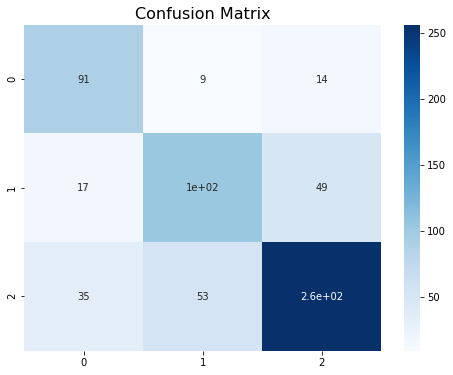

In [ ]:
sentimen_label = model_predict('rf', X_sm_sentimen, y_sm_sentimen, X_test_sentimen, y_test_sentimen, 'sentimen')

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.7s finished


{'alpha': 1e-05}
Time:  5.182990253000753
[0.73015873 0.71428571 0.6031746  0.49206349 0.66666667 0.65079365
 0.6031746  0.63492063 0.69354839 0.59677419]
              precision    recall  f1-score   support

        -1.0       0.46      0.64      0.53       170
         0.0       0.72      0.55      0.62       344
         1.0       0.62      0.72      0.67       114

    accuracy                           0.60       628
   macro avg       0.60      0.63      0.61       628
weighted avg       0.63      0.60      0.61       628



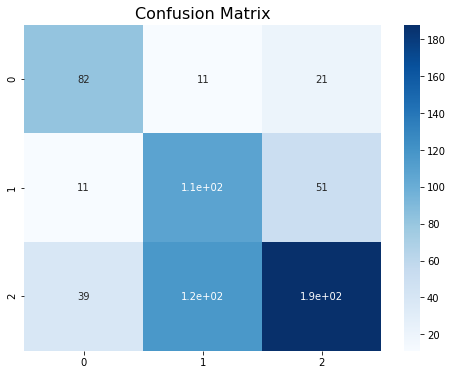

In [ ]:
nb_sentimen_label = model_predict('mnb', X_sm_sentimen, y_sm_sentimen, X_test_sentimen, y_test_sentimen, 'sentimen')

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 43.6min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 114.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 150.5min finished


{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
Time:  9163.276585598003
[0.80952381 0.85714286 0.80952381 0.82539683 0.80952381 0.84126984
 0.80952381 0.79365079 0.74193548 0.83870968]
              precision    recall  f1-score   support

        -1.0       0.85      0.96      0.90       509
         1.0       0.64      0.29      0.40       119

    accuracy                           0.83       628
   macro avg       0.75      0.62      0.65       628
weighted avg       0.81      0.83      0.81       628



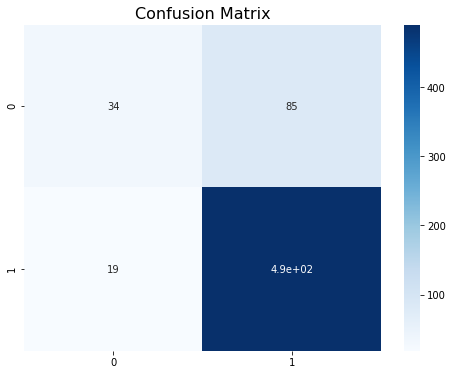

In [ ]:
sarkasme_label = model_predict('rf', X_sm_sarkasme, y_sm_sarkasme, X_test_sarkasme, y_test_sarkasme, 'sarkasme')

In [ ]:
change_label(sarkasme_label, sentimen_label, y_test_sentimen)

1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
              precision    recall  f1-score   support

        -1.0       0.58      0.66      0.62       170
         0.0       0.81      0.69      0.75       344
         1.0       0.65      0.80      0.71       114

    accuracy                           0.70       628
   macro avg       0.68      0.72      0.69       628
weighted avg       0.72      0.70      0.71       628



In [ ]:
change_label(sarkasme_label, nb_sentimen_label, y_test_sentimen)

0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
              precision    recall  f1-score   support

        -1.0       0.44      0.68      0.54       170
         0.0       0.73      0.50      0.59       344
         1.0       0.63      0.72      0.67       114

    accuracy                           0.59       628
   macro avg       0.60      0.63      0.60       628
weighted avg       0.63      0.59      0.59       628



In [ ]:
data1 = pd.concat([pd.DataFrame(X_test_sarkasme).reindex(pd.Series(y_test_sarkasme).index), pd.Series(y_test_sarkasme)], axis=1)
sarkasme_label = pd.DataFrame(sarkasme_label, columns = ['prediksi sarkasme'])

In [ ]:
for i in range(len(data1)):
  if sarkasme_label['prediksi sarkasme'][i] == 1:
    index = data1.iloc[i].name
    print(data.loc[index]['Comment'])
    print("Kelas sentimen: ", data.loc[index]['Kelas sentimen'], " | Kelas prediksi sentimen: ",sentimen_label[i])

"jika ada yg blm
 sempurna maka dipersilahkan untuk
 menyempurnakan sesuai mekanisme dan peraturan" si kecil aktif matiin mic ya bund? gausah deh. gausah ngasi harapan, gausa ngasi janji kalau ga ada bukti, toh sudah jelas hal kecil kmrn aja tidak dihargai. lalu bagaimana suara kita
 di dengar? harus matiin nyawa ibu dlu? uppsss ditunggu ❤️
Kelas sentimen:  -1.0  | Kelas prediksi sentimen:  -1.0
Aku kemaren liat di YouTube gedung DPR di taburin air air santet gitu gaes gila sih 😆
Kelas sentimen:  0.0  | Kelas prediksi sentimen:  -1.0
Kalian wakil siapa? Kok mau ditemui rakyat, malah ngumpet diketek polisi...??
Kelas sentimen:  0.0  | Kelas prediksi sentimen:  -1.0
Micnya di mute aja
Kelas sentimen:  -1.0  | Kelas prediksi sentimen:  -1.0
Kan sudah ada mic, pakai maskernya tetap salah
Kelas sentimen:  0.0  | Kelas prediksi sentimen:  -1.0
Dewan penghianat rakyat
Kelas sentimen:  -1.0  | Kelas prediksi sentimen:  -1.0
Gara" dpr uang gw abis tup up pubg bngke 🤣🤣
Kelas sentimen:  0.0  | Ke

In [ ]:
print(np.count_nonzero(sentimen_label == 1))
print(np.count_nonzero(sentimen_label == -1))
print(np.count_nonzero(sentimen_label == 0))

141
193
294


MAX_FEATURES = 2000 WITH SMOTE

In [ ]:
vectorizer = TfidfVectorizer(max_features = 2000)
score = vectorizer.fit_transform(corpus)
header = vectorizer.get_feature_names()
tfidf_scores = score.toarray()


tfidf_table_2 = pd.DataFrame(np.array(tfidf_scores),columns=header)

In [ ]:
X_sarkasme_2 = pd.concat([normalized_data.iloc[:, :].reindex(tfidf_table_2.index), tfidf_table_2], axis=1)
X_sentimen_2 = tfidf_table_2
y_sentimen_2 = data['Kelas sentimen']
y_sarkasme_2 = data['Kelas sarkasme']

In [ ]:
X_train_sentimen_2, X_test_sentimen_2, y_train_sentimen_2, y_test_sentimen_2 = train_test_split(X_sentimen_2, y_sentimen_2, test_size=0.2, random_state=random_state)

In [ ]:
X_train_sarkasme_2, X_test_sarkasme_2, y_train_sarkasme_2, y_test_sarkasme_2 = train_test_split(X_sarkasme_2, y_sarkasme_2, test_size=0.2, random_state=random_state)

In [ ]:
X_sm_sentimen_2, y_sm_sentimen_2 = smote_nc.fit_resample(X_train_sentimen_2, y_train_sentimen_2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_sm_sarkasme_2, y_sm_sarkasme_2 = sm.fit_resample(X_train_sarkasme_2, y_train_sarkasme_2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 111.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 301.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 386.4min finished


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
Time:  23210.326496004003
[0.65079365 0.6984127  0.74603175 0.58730159 0.74603175 0.71428571
 0.74603175 0.76190476 0.64516129 0.74193548]
              precision    recall  f1-score   support

        -1.0       0.72      0.48      0.57       170
         0.0       0.74      0.87      0.80       344
         1.0       0.68      0.64      0.66       114

    accuracy                           0.72       628
   macro avg       0.71      0.66      0.68       628
weighted avg       0.72      0.72      0.71       628



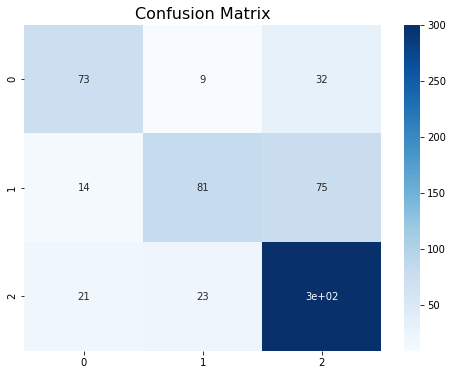

In [ ]:
sentimen_label_2 = model_predict('rf', X_sm_sentimen_2, y_sm_sentimen_2, X_test_sentimen_2, y_test_sentimen_2, 'sentimen')

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.2s finished


{'alpha': 1e-05}
Time:  7.761672904001898
[0.6984127  0.71428571 0.6031746  0.53968254 0.66666667 0.6984127
 0.6031746  0.65079365 0.72580645 0.59677419]
              precision    recall  f1-score   support

        -1.0       0.45      0.54      0.49       170
         0.0       0.69      0.62      0.65       344
         1.0       0.67      0.66      0.66       114

    accuracy                           0.61       628
   macro avg       0.60      0.61      0.60       628
weighted avg       0.62      0.61      0.61       628



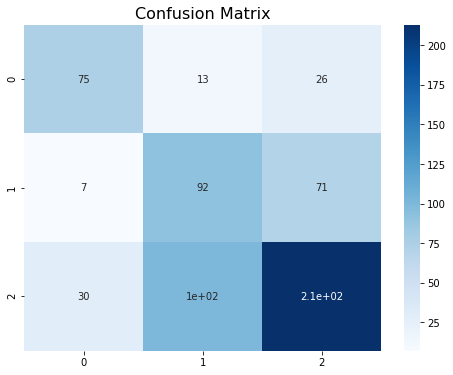

In [ ]:
nb_sentimen_label_2 = model_predict('mnb', X_sm_sentimen_2, y_sm_sentimen_2, X_test_sentimen_2, y_test_sentimen_2, 'sentimen')

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 79.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 200.7min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 257.8min finished


{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
Time:  15662.365150751
[0.82539683 0.84126984 0.84126984 0.82539683 0.84126984 0.87301587
 0.80952381 0.79365079 0.77419355 0.82258065]
              precision    recall  f1-score   support

        -1.0       0.84      0.96      0.90       509
         1.0       0.58      0.24      0.34       119

    accuracy                           0.82       628
   macro avg       0.71      0.60      0.62       628
weighted avg       0.79      0.82      0.79       628



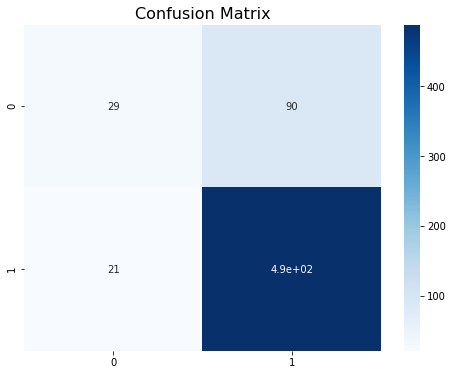

In [ ]:
sarkasme_label_2 = model_predict('rf', X_sm_sarkasme_2, y_sm_sarkasme_2, X_test_sarkasme_2, y_test_sarkasme_2, 'sarkasme')

In [ ]:
change_label(sarkasme_label_2, sentimen_label_2, y_test_sentimen_2)

1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
              precision    recall  f1-score   support

        -1.0       0.63      0.56      0.59       170
         0.0       0.75      0.80      0.77       344
         1.0       0.69      0.64      0.66       114

    accuracy                           0.71       628
   macro avg       0.69      0.67      0.68     

In [ ]:
change_label(sarkasme_label_2, nb_sentimen_label_2, y_test_sentimen_2)

0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
              precision    recall  f1-score   support

        -1.0       0.44      0.61      0.51       170
         0.0       0.70      0.57      0.63       344
         1.0       0.68      0.66      0.67       114

    accuracy                           0.60       628
   macro avg       0.60      0.61      0.60       628
weighted avg       0.62      0.60      0.60       628



MAX_FEATURES = 3000 WITH SMOTE

In [ ]:
vectorizer = TfidfVectorizer(max_features = 3000)
score = vectorizer.fit_transform(corpus)
header = vectorizer.get_feature_names()
tfidf_scores = score.toarray()


tfidf_table_3 = pd.DataFrame(np.array(tfidf_scores),columns=header)

In [ ]:
X_sarkasme_3 = pd.concat([normalized_data.iloc[:, :].reindex(tfidf_table_3.index), tfidf_table_3], axis=1)
X_sentimen_3 = tfidf_table_3
y_sentimen_3 = data['Kelas sentimen']
y_sarkasme_3 = data['Kelas sarkasme']

In [ ]:
X_train_sentimen_3, X_test_sentimen_3, y_train_sentimen_3, y_test_sentimen_3 = train_test_split(X_sentimen_3, y_sentimen_3, test_size=0.2, random_state=random_state)

In [ ]:
X_train_sarkasme_3, X_test_sarkasme_3, y_train_sarkasme_3, y_test_sarkasme_3 = train_test_split(X_sarkasme_3, y_sarkasme_3, test_size=0.2, random_state=random_state)

In [ ]:
X_sm_sentimen_3, y_sm_sentimen_3 = smote_nc.fit_resample(X_train_sentimen_3, y_train_sentimen_3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_sm_sarkasme_3, y_sm_sarkasme_3 = sm.fit_resample(X_train_sarkasme_3, y_train_sarkasme_3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 99.5min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 277.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 359.2min finished


{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
Time:  21772.368295398002
[0.61904762 0.71428571 0.74603175 0.58730159 0.74603175 0.65079365
 0.73015873 0.79365079 0.70967742 0.69354839]
              precision    recall  f1-score   support

        -1.0       0.71      0.50      0.59       170
         0.0       0.74      0.85      0.79       344
         1.0       0.67      0.66      0.66       114

    accuracy                           0.72       628
   macro avg       0.71      0.67      0.68       628
weighted avg       0.72      0.72      0.71       628



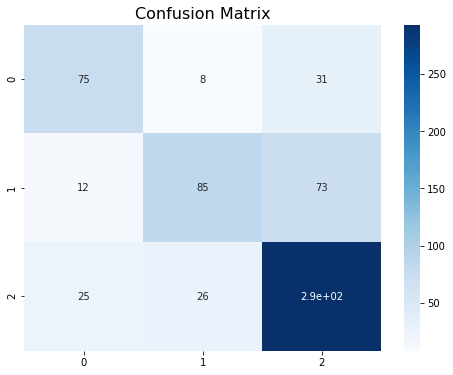

In [ ]:
sentimen_label_3 = model_predict('rf', X_sm_sentimen_3, y_sm_sentimen_3, X_test_sentimen_3, y_test_sentimen_3, 'sentimen')

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   14.0s finished


{'alpha': 1e-05}
Time:  14.479309345999354
[0.71428571 0.71428571 0.6031746  0.55555556 0.65079365 0.6984127
 0.61904762 0.61904762 0.70967742 0.59677419]
              precision    recall  f1-score   support

        -1.0       0.44      0.54      0.49       170
         0.0       0.69      0.60      0.64       344
         1.0       0.68      0.71      0.69       114

    accuracy                           0.61       628
   macro avg       0.60      0.62      0.61       628
weighted avg       0.62      0.61      0.61       628



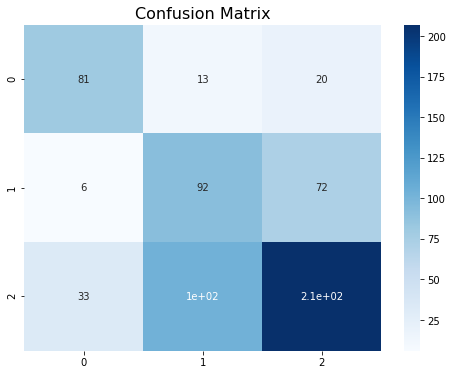

In [ ]:
nb_sentimen_label_3 = model_predict('mnb', X_sm_sentimen_3, y_sm_sentimen_3, X_test_sentimen_3, y_test_sentimen_3, 'sentimen')

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 92.8min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 243.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 314.6min finished


{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
Time:  19183.166230667
[0.80952381 0.84126984 0.80952381 0.82539683 0.84126984 0.87301587
 0.84126984 0.79365079 0.77419355 0.83870968]
              precision    recall  f1-score   support

        -1.0       0.85      0.97      0.90       509
         1.0       0.63      0.24      0.35       119

    accuracy                           0.83       628
   macro avg       0.74      0.61      0.63       628
weighted avg       0.80      0.83      0.80       628



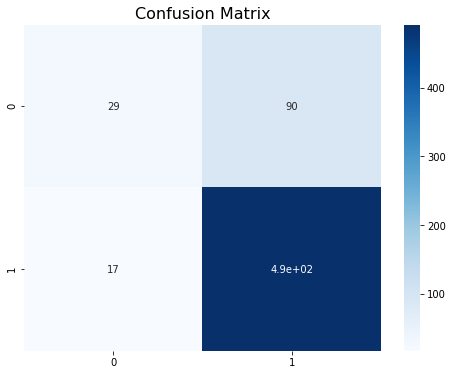

In [ ]:
sarkasme_label_3 = model_predict('rf', X_sm_sarkasme_3, y_sm_sarkasme_3, X_test_sarkasme_3, y_test_sarkasme_3, 'sarkasme')

In [ ]:
change_label(sarkasme_label_3, sentimen_label_3, y_test_sentimen_3)

1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
              precision    recall  f1-score   support

        -1.0       0.64      0.59      0.61       170
         0.0       0.75      0.79      0.77       344
         1.0       0.68      0.67      0.68       114

    accuracy                           0.71       628
   macro avg       0.69      0.68      0.69       628
weighted avg       0.71      0.71      0.71       628



In [ ]:
change_label(sarkasme_label_3, nb_sentimen_label_3, y_test_sentimen_3)

0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
              precision    recall  f1-score   support

        -1.0       0.43      0.60      0.50       170
         0.0       0.70      0.56      0.62       344
         1.0       0.69      0.71      0.70       114

    accuracy                           0.60       628
   macro avg       0.61      0.62      0.61       628
weighted avg       0.63      0.60      0.60       628




MAX_FEATURES UNIGRAM + BIGRAM 1000 WITH SMOTE

In [ ]:

vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=1000)

score = vectorizer.fit_transform(corpus)
header = vectorizer.get_feature_names()
tfidf_scores = score.toarray()


tfidf_bigram_table = pd.DataFrame(np.array(tfidf_scores),columns=header)

In [ ]:
X_sarkasme_bigram = pd.concat([normalized_data.iloc[:, :].reindex(tfidf_bigram_table.index), tfidf_bigram_table], axis=1)
X_sentimen_bigram = tfidf_bigram_table
y_sentimen_bigram = data['Kelas sentimen']
y_sarkasme_bigram = data['Kelas sarkasme']

In [ ]:
X_train_bigram_sentimen, X_test_bigram_sentimen, y_train_bigram_sentimen, y_test_bigram_sentimen = train_test_split(X_sentimen_bigram, y_sentimen_bigram, test_size=0.2, random_state=random_state)

In [ ]:
X_train_bigram_sarkasme, X_test_bigram_sarkasme, y_train_bigram_sarkasme, y_test_bigram_sarkasme = train_test_split(X_sarkasme_bigram, y_sarkasme_bigram, test_size=0.2, random_state=random_state)

In [ ]:
X_sm_sentimen_bigram, y_sm_sentimen_bigram = smote_nc.fit_resample(X_train_bigram_sentimen, y_train_bigram_sentimen)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_sm_sarkasme_bigram, y_sm_sarkasme_bigram = sm.fit_resample(X_train_bigram_sarkasme, y_train_bigram_sarkasme)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 39.0min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 103.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 141.5min finished


{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Time:  8528.262053792001
[0.6031746  0.6984127  0.77777778 0.57142857 0.68253968 0.6984127
 0.66666667 0.74603175 0.70967742 0.67741935]
              precision    recall  f1-score   support

        -1.0       0.62      0.60      0.61       170
         0.0       0.80      0.74      0.77       344
         1.0       0.61      0.77      0.68       114

    accuracy                           0.71       628
   macro avg       0.68      0.71      0.69       628
weighted avg       0.72      0.71      0.71       628



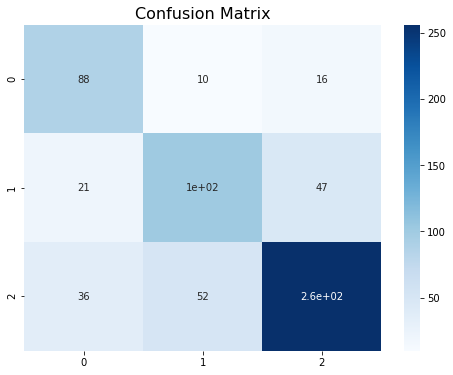

In [ ]:
sentimen_label_bigram = model_predict('rf', X_sm_sentimen_bigram, y_sm_sentimen_bigram, X_test_bigram_sentimen, y_test_bigram_sentimen, 'sentimen')

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished


{'alpha': 1e-05}
Time:  2.4004621869989933
[0.6984127  0.73015873 0.61904762 0.44444444 0.66666667 0.58730159
 0.6031746  0.61904762 0.67741935 0.56451613]
              precision    recall  f1-score   support

        -1.0       0.46      0.64      0.54       170
         0.0       0.73      0.54      0.62       344
         1.0       0.61      0.73      0.67       114

    accuracy                           0.60       628
   macro avg       0.60      0.64      0.61       628
weighted avg       0.63      0.60      0.61       628



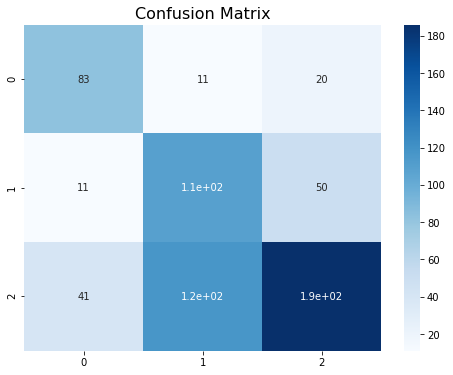

In [ ]:
nb_sentimen_label_bigram = model_predict('mnb', X_sm_sentimen_bigram, y_sm_sentimen_bigram, X_test_bigram_sentimen, y_test_bigram_sentimen, 'sentimen')

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 74.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 97.0min finished


{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
Time:  5924.587296553
[0.76190476 0.85714286 0.80952381 0.82539683 0.79365079 0.85714286
 0.76190476 0.77777778 0.77419355 0.82258065]
              precision    recall  f1-score   support

        -1.0       0.85      0.95      0.90       509
         1.0       0.58      0.29      0.38       119

    accuracy                           0.82       628
   macro avg       0.71      0.62      0.64       628
weighted avg       0.80      0.82      0.80       628



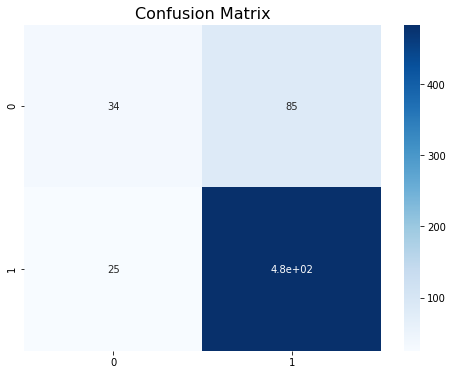

In [ ]:
sarkasme_label_bigram = model_predict('rf', X_sm_sarkasme_bigram, y_sm_sarkasme_bigram, X_test_bigram_sarkasme, y_test_bigram_sarkasme, 'sarkasme')

In [ ]:
change_label(sarkasme_label_bigram, sentimen_label_bigram, y_test_bigram_sentimen)

1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
              precision    recall  f1-score   support

        -1.0       0.55      0.65      0.59       170
         0.0       0.80      0.67      0.73       344
         1.0       0.63      0.77      0.69       114

    accuracy                           0.68       628
   macro avg       0.66      0.70      0.67       628
weighted avg       0.70      0.68      0.69  

In [ ]:
change_label(sarkasme_label_bigram, nb_sentimen_label_bigram, y_test_bigram_sentimen)

0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
              precision    recall  f1-score   support

        -1.0       0.43      0.68      0.53       170
         0.0       0.72      0.47      0.56       344
         1.0       0.62      0.73      0.67       114

    accuracy                           0.57       628
   macro avg       0.59      0.63      0.59       628
weighted avg       0.62      0.57      0.57       628



BIGRAM MAX FEATURES = 1000 WITH SMOTE






In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,2), max_features=1000)

score = vectorizer.fit_transform(corpus)
header = vectorizer.get_feature_names()
tfidf_scores = score.toarray()


tfidf_bigram_table_2 = pd.DataFrame(np.array(tfidf_scores),columns=header)

In [ ]:
X_sarkasme_bigram_2 = pd.concat([normalized_data.iloc[:, :].reindex(tfidf_bigram_table_2.index), tfidf_bigram_table_2], axis=1)
X_sentimen_bigram_2 = tfidf_bigram_table_2
y_sentimen_bigram_2 = data['Kelas sentimen']
y_sarkasme_bigram_2 = data['Kelas sarkasme']

In [ ]:
X_train_bigram_sentimen_2, X_test_bigram_sentimen_2, y_train_bigram_sentimen_2, y_test_bigram_sentimen_2 = train_test_split(X_sentimen_bigram_2, y_sentimen_bigram_2, test_size=0.2, random_state=random_state)

In [ ]:
X_train_bigram_sarkasme_2, X_test_bigram_sarkasme_2, y_train_bigram_sarkasme_2, y_test_bigram_sarkasme_2 = train_test_split(X_sarkasme_bigram_2, y_sarkasme_bigram_2, test_size=0.2, random_state=random_state)

In [ ]:
X_sm_sentimen_bigram_2, y_sm_sentimen_bigram_2 = smote_nc.fit_resample(X_train_bigram_sentimen_2, y_train_bigram_sentimen_2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_sm_sarkasme_bigram_2, y_sm_sarkasme_bigram_2 = sm.fit_resample(X_train_bigram_sarkasme_2, y_train_bigram_sarkasme_2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 139.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 183.0min finished


{'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}
Time:  11093.218898817999
[0.6031746  0.57142857 0.57142857 0.55555556 0.66666667 0.6031746
 0.61904762 0.66666667 0.61290323 0.62903226]
              precision    recall  f1-score   support

        -1.0       0.72      0.22      0.34       170
         0.0       0.65      0.92      0.76       344
         1.0       0.66      0.50      0.57       114

    accuracy                           0.65       628
   macro avg       0.67      0.55      0.56       628
weighted avg       0.67      0.65      0.61       628



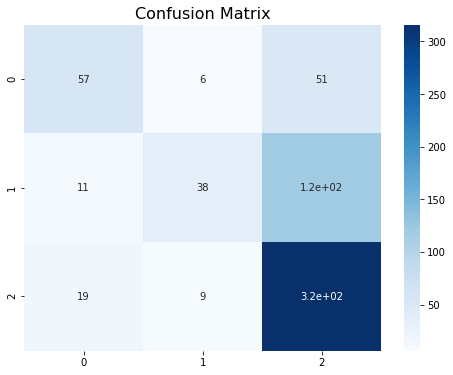

In [ ]:
sentimen_label_bigram_2 = model_predict('rf', X_sm_sentimen_bigram_2, y_sm_sentimen_bigram_2, X_test_bigram_sentimen_2, y_test_bigram_sentimen_2, 'sentimen')

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished


{'alpha': 1e-05}
Time:  2.8213988120005524
[0.61904762 0.66666667 0.6031746  0.55555556 0.65079365 0.6031746
 0.63492063 0.68253968 0.58064516 0.64516129]
              precision    recall  f1-score   support

        -1.0       0.31      0.64      0.42       170
         0.0       0.64      0.33      0.44       344
         1.0       0.65      0.55      0.60       114

    accuracy                           0.46       628
   macro avg       0.53      0.51      0.48       628
weighted avg       0.55      0.46      0.46       628



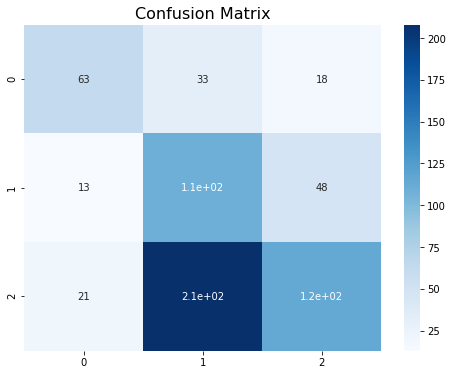

In [ ]:
nb_sentimen_label_bigram_2 = model_predict('mnb', X_sm_sentimen_bigram_2, y_sm_sentimen_bigram_2, X_test_bigram_sentimen_2, y_test_bigram_sentimen_2, 'sentimen')

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 91.6min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 121.9min finished


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
Time:  7327.078892987
[0.76190476 0.82539683 0.76190476 0.82539683 0.82539683 0.84126984
 0.77777778 0.80952381 0.75806452 0.82258065]
              precision    recall  f1-score   support

        -1.0       0.83      0.91      0.87       509
         1.0       0.38      0.23      0.28       119

    accuracy                           0.78       628
   macro avg       0.61      0.57      0.58       628
weighted avg       0.75      0.78      0.76       628



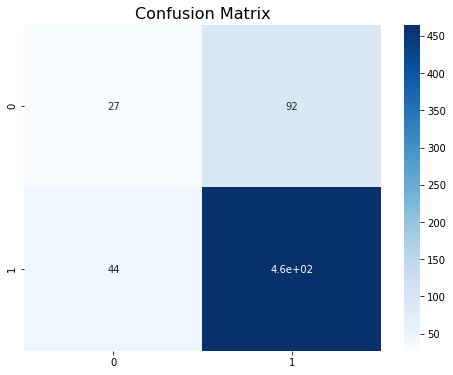

In [ ]:
sarkasme_label_bigram_2 = model_predict('rf', X_sm_sarkasme_bigram_2, y_sm_sarkasme_bigram_2, X_test_bigram_sarkasme_2, y_test_bigram_sarkasme_2, 'sarkasme')

In [ ]:
change_label(sarkasme_label_bigram_2, sentimen_label_bigram_2, y_test_bigram_sentimen_2)

0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
chang

In [ ]:
change_label(sarkasme_label_bigram_2, nb_sentimen_label_bigram_2, y_test_bigram_sentimen_2)

0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
1.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
0.0
-1.0
changed
              precision    recall  f1-score   support

        -1.0       0.30      0.68      0.42       170
         0.0       0.61      0.26      0.37       344
         1.0       0.65      0.54      0.59       114

    accuracy                           0.43       628
   macro avg       0.52      0.49      0.46       628
weighted avg       0.53      0.43      0.42       628



TFIDF MAX_FEATURES = 1000, WITHOUT SMOTE ON SENTIMENT

In [ ]:
vectorizer = TfidfVectorizer(max_features = 1000)
score = vectorizer.fit_transform(corpus)
header = vectorizer.get_feature_names()
tfidf_scores = score.toarray()


tfidf_table_wo_smote = pd.DataFrame(np.array(tfidf_scores),columns=header)

In [ ]:
X_sentimen_wo_smote = tfidf_table_wo_smote
y_sentimen_wo_smote = data['Kelas sentimen']

In [ ]:
X_train_sentimen_wo_smote, X_test_sentimen_wo_smote, y_train_sentimen_wo_smote, y_test_sentimen_wo_smote = train_test_split(X_sentimen_wo_smote, y_sentimen_wo_smote, test_size=0.2, random_state=random_state)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 68.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 89.0min finished


{'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}
Time:  5399.066006534
[0.6031746  0.68253968 0.74603175 0.53968254 0.74603175 0.6984127
 0.71428571 0.71428571 0.70967742 0.72580645]
              precision    recall  f1-score   support

        -1.0       0.68      0.42      0.52       170
         0.0       0.70      0.90      0.78       344
         1.0       0.75      0.54      0.63       114

    accuracy                           0.70       628
   macro avg       0.71      0.62      0.64       628
weighted avg       0.70      0.70      0.68       628



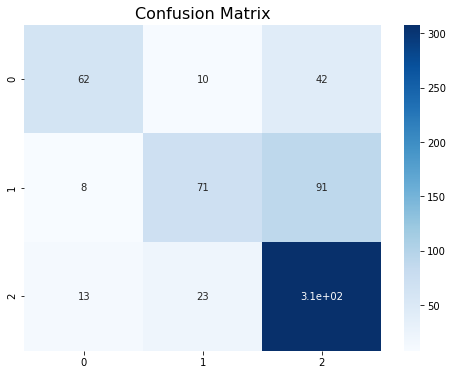

In [ ]:
sentimen_label_wo_smote = model_predict('rf', X_train_sentimen_wo_smote, y_train_sentimen_wo_smote, X_test_sentimen_wo_smote, y_test_sentimen_wo_smote, 'sentimen')

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished


{'alpha': 1}
Time:  1.3619714550004574
[0.63492063 0.6031746  0.57142857 0.55555556 0.76190476 0.65079365
 0.68253968 0.6984127  0.59677419 0.62903226]
              precision    recall  f1-score   support

        -1.0       0.67      0.39      0.49       170
         0.0       0.67      0.88      0.76       344
         1.0       0.81      0.53      0.64       114

    accuracy                           0.68       628
   macro avg       0.72      0.60      0.63       628
weighted avg       0.69      0.68      0.67       628



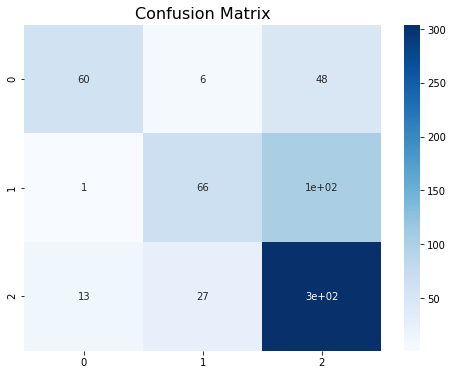

In [ ]:
nb_sentimen_label_bigram_2 = model_predict('mnb', X_train_sentimen_wo_smote, y_train_sentimen_wo_smote, X_test_sentimen_wo_smote, y_test_sentimen_wo_smote, 'sentimen')

KLASIFIKASI SARKASME WITHOUT UNIGRAM

In [ ]:
X_sarkasme_wo_unigram = normalized_data
y_sarkasme_wo_unigram = data['Kelas sarkasme']

In [ ]:
X_train_sarkasme_wo_unigram, X_test_sarkasme_wo_unigram, y_train_sarkasme_wo_unigram, y_test_sarkasme_wo_unigram = train_test_split(X_sarkasme_wo_unigram, y_sarkasme_wo_unigram, test_size=0.2, random_state=random_state)

In [ ]:
X_sm_sarkasme_wo_unigram, y_sm_sarkasme_wo_unigram = sm.fit_resample(X_train_sarkasme_wo_unigram, y_train_sarkasme_wo_unigram)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
sarkasme_label_wo_unigram = model_predict('rf', X_sm_sarkasme_wo_unigram, y_sm_sarkasme_wo_unigram, X_test_sarkasme_wo_unigram, y_test_sarkasme_wo_unigram, 'sarkasme')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 63.5min finished


{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True}
              precision    recall  f1-score   support

          -1       0.82      0.86      0.84       509
           1       0.23      0.18      0.20       119

    accuracy                           0.73       628
   macro avg       0.52      0.52      0.52       628
weighted avg       0.71      0.73      0.72       628



SARKASME ONLY POSITIVE LABELS


In [ ]:
X_sarkasme_1 = pd.concat([normalized_data.iloc[:, :].reindex(tfidf_table.index), tfidf_table], axis=1)

In [ ]:
y_sarkasme_1 = data['Kelas sarkasme']

In [ ]:
X_train_sarkasme_pos_label, X_test_sarkasme_pos_label, y_train_sarkasme_pos_label, y_test_sarkasme_pos_label = train_test_split(X_sarkasme_1, y_sarkasme_1, test_size=0.2, random_state=random_state)

In [ ]:
X_train_sarkasme_pos_label.loc[1292]

Emoji sentimen       0.365907
Emoji kontras        0.000000
Word sentimen        0.481481
Word kontras         0.500000
Jumlah tanda seru    0.000000
                       ...   
yng                  0.000000
you                  0.000000
yuk                  0.000000
zalim                0.000000
zaman                0.000000
Name: 1292, Length: 1011, dtype: float64

In [ ]:
data.loc[1292]['Kelas sentimen']

0.0

In [ ]:
pos_data = data[data['Kelas sentimen'] == 1]

In [ ]:
pos_data.loc[0]

Comment                       Maju n berkembang
UserName                       ulina.ulina.5283
Kelas sentimen                                1
Kelas sarkasme                               -1
clean                              maju kembang
Emoji sentimen                                0
Emoji kontras                                 0
Word sentimen                                 3
Word kontras                                  3
Jumlah tanda seru                             0
Jumlah tanda tanya                            0
Jumlah titik                                  0
Jumlah tanda kutip                            0
Jumlah huruf kapital                          1
Jumlah pengulangan huruf                      0
Jumlah pengulangan tertawa                    0
Name: 0, dtype: object

In [ ]:
index = [] 

In [ ]:
for i in range(len(X_train_sarkasme_pos_label)):
  idx = X_train_sarkasme_pos_label.iloc[i].name
  if data.loc[idx]['Kelas sentimen'] == 1:
    index.append(idx)

In [ ]:
y_train_sarkasme_pos_label

1292    1.0
2302   -1.0
761    -1.0
2194   -1.0
1241   -1.0
       ... 
3092   -1.0
1095   -1.0
1130   -1.0
1294   -1.0
860    -1.0
Name: Kelas sarkasme, Length: 2512, dtype: float64

In [ ]:
X_train_new = X_train_sarkasme_pos_label.loc[index,:]

In [ ]:
y_train_new = y_train_sarkasme_pos_label.loc[index]

In [ ]:
X_sm_sarkasme_new, y_sm_sarkasme_new = sm.fit_resample(X_train_new, y_train_new)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
index = [] 

In [ ]:
for i in range(len(X_test_sarkasme_pos_label)):
  idx = X_test_sarkasme_pos_label.iloc[i].name
  if data.loc[idx]['Kelas sentimen'] == 1:
    index.append(idx)

In [ ]:
y_train_sarkasme_pos_label

1292    1.0
2302   -1.0
761    -1.0
2194   -1.0
1241   -1.0
       ... 
3092   -1.0
1095   -1.0
1130   -1.0
1294   -1.0
860    -1.0
Name: Kelas sarkasme, Length: 2512, dtype: float64

In [ ]:
X_test_new = X_test_sarkasme_pos_label.loc[index,:]

In [ ]:
y_test_new = y_test_sarkasme_pos_label.loc[index]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.6min finished


{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Time:  840.7746542750001
[0.91666667 0.91666667 0.91666667 0.91666667 1.         1.
 1.         1.         1.         1.        ]
              precision    recall  f1-score   support

        -1.0       0.96      1.00      0.98       110
         1.0       0.00      0.00      0.00         4

    accuracy                           0.96       114
   macro avg       0.48      0.50      0.49       114
weighted avg       0.93      0.96      0.95       114



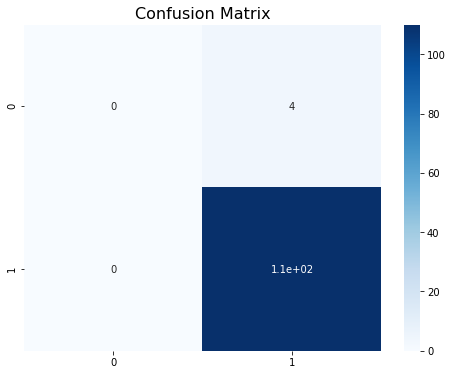

In [ ]:
sarkasme_label_pos_label = model_predict('rf', X_sm_sarkasme_new, y_sm_sarkasme_new, X_test_new, y_test_new, 'sarkasme')

In [ ]:
data[(data['Kelas sentimen'] == 1) & (data['Kelas sarkasme'] == 1)]

,Comment,UserName,Kelas sentimen,Kelas sarkasme,clean,Emoji sentimen,Emoji kontras,Word sentimen,Word kontras,Jumlah tanda seru,Jumlah tanda tanya,Jumlah titik,Jumlah tanda kutip,Jumlah huruf kapital,Jumlah pengulangan huruf,Jumlah pengulangan tertawa
47,Pak sy belum dengar UU Omnibus lawnya bapak ud...,rudi.b.r,1.0,1.0,dengar uu omnibus lawnya ttd serah ttd deh cep...,0.522,0.522,1,8,0,0,1,0,4,3,0
50,Nasabah terbaik pasti lah di support sama bank...,iilhmmmaul,1.0,1.0,nasabah baik support bank nya biar rajin nguta...,0.000,0.000,16,4,0,0,0,0,1,1,0
54,Kaum bodoh yang menolak omnibuslow lu mau misk...,__miiiiiiiiin_,1.0,1.0,kaum bodoh tolak omnibuslow miskin hah ajak ma...,0.000,0.000,-2,9,0,2,4,2,2,5,3
143,ikutin penguasa aja rakyat kecil bisa apa hhe.,bngsrr_,1.0,1.0,ikutin kuasa rakyat hhe,0.000,0.000,3,3,0,0,1,0,0,1,2
283,Untung pak jokowi udah 2 periode.. besok2 kalo...,van.limburg.stirum,1.0,1.0,untung jokowi periode besok sumpah jabat amana...,0.000,0.000,-5,10,0,0,5,2,166,4,2
377,Kalo kata pemerintah hoak ya hoak,mfaisalakbrr,1.0,1.0,perintah isu bohong iya isu bohong,0.000,0.000,-12,5,0,0,0,0,1,0,2
397,"bapak saya percaya bapak, dan gak pernah mau k...",moccaronie,1.0,1.0,percaya kasih pendapapt uu isu bohong,0.000,0.000,-2,7,0,0,0,0,0,2,1
410,👍👍👍👍👍👍🖕🖕pak joko widodo,syifa.auliah.338,1.0,1.0,thumbs up thumbs up thumbs up thumbs up thumbs...,3.132,0.522,0,0,0,0,0,0,0,6,0
451,"Penanganan Halte cukup sigap dan tanggap, mesk...",syafra92,1.0,1.0,tangan halte sigap tanggap tuduh cari proyek a...,1.684,0.740,14,7,0,3,3,0,7,6,0
460,“Anjing menggonggong Kafilah berlalu..” Apapun...,febrian_amanda,1.0,1.0,anjing gonggong kafilah apa tuding miring oran...,2.156,0.746,4,7,2,0,4,0,27,5,1


TRAIN WITH NON SARCASM DATASET, TEST WITH SARCASM DATASET

In [ ]:
non_sarkasme = data[data['Kelas sarkasme'] == -1]
data_sarkasme = data[data['Kelas sarkasme'] == 1]
print(non_sarkasme)
print(data_sarkasme)

                                                Comment  ... Jumlah pengulangan tertawa
0                                     Maju n berkembang  ...                          0
1     Nggak usah pda ngoceh Mulu, lu nyobain sono ja...  ...                          0
2     Siapa org yg membayar hutang negara??? Dan sam...  ...                          0
3                                                    ❤️  ...                          0
4     Yang kaya makin kaya yang miskin makin miskin ...  ...                          0
...                                                 ...  ...                        ...
3135  Assalamu'allaikum Wr.Wb.Bpk.Presiden Jokowi 🙏 ...  ...                          3
3136  Kalo bener hoaxs yah nyatain dong di depan rak...  ...                          1
3137  Hahahahahaha lucu juga ya tom&jerry nya maen l...  ...                          5
3138                                           DPR? COT  ...                          0
3139      Mudah buat para pengan

In [ ]:
data_sarkasme[(data_sarkasme['Kelas sentimen'] == -1) | (data_sarkasme['Kelas sentimen'] == 1)]

,Comment,UserName,Kelas sentimen,Kelas sarkasme,clean,Emoji sentimen,Emoji kontras,Word sentimen,Word kontras,Jumlah tanda seru,Jumlah tanda tanya,Jumlah titik,Jumlah tanda kutip,Jumlah huruf kapital,Jumlah pengulangan huruf,Jumlah pengulangan tertawa
19,pendapat masyarakat diabaikan?,ammarysrhd,-1.0,1.0,dapat masyarakat abai,0.000,0.000,-1,5,0,1,0,0,0,0,0
22,"Kerja, kerja, kerja, di kerjai pemerintah! Kas...",__poemforus,-1.0,1.0,kerja kerja kerja kerja perintah kasihan rakya...,0.746,0.746,4,9,1,0,1,0,4,0,1
37,PAKKK BAYAR UTANG NYAA KAPAN PAAKKK😂😂😂😂😂😂😂😂😂😂T...,afis_17._.10_,-1.0,1.0,pakkk bayar utang nyaa paakkk face with tears ...,2.210,0.221,-3,5,0,0,0,0,66,19,0
45,Wwkkw orang anda sbg presiden udh baca isi sem...,suhufi_m,-1.0,1.0,wwkkw orang sbg presiden baca isi nya trus wor...,0.442,0.221,10,3,0,2,0,0,3,3,1
47,Pak sy belum dengar UU Omnibus lawnya bapak ud...,rudi.b.r,1.0,1.0,dengar uu omnibus lawnya ttd serah ttd deh cep...,0.522,0.522,1,8,0,0,1,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,"Oke pak, klau hanya hoax knpa sdah di sahkan? ...",j_bolowantu28,-1.0,1.0,oke klau isu bohong sdah sahkan dngan alas bpa...,0.000,0.000,4,8,4,3,1,0,8,6,4
3099,"Tolong lah pak, dengar suara kami sebagai raky...",irvanchaerull,-1.0,1.0,tolong dengar suara rakyat sumber diri negara ...,0.000,0.000,36,10,2,2,9,0,12,4,6
3105,lalu ada apa dengan pengesahan RUU pada waktu ...,rental_mobil_zkproject,-1.0,1.0,kesah ruu malam rakyat tidur pulas rakyat waki...,0.412,0.412,19,10,0,3,0,0,6,7,9
3116,Rakyat ingin mengadu dengan cara unjuk rasa......,gueaja65,-1.0,1.0,rakyat adu unjuk temu kangen demo grinning squ...,0.824,0.412,-4,6,0,4,3,0,2,5,0


In [ ]:
non_sarkasme.iloc[-1].name

3139

In [ ]:
data.loc[3139]['Kelas sarkasme']

-1.0

In [ ]:
tfidf_table.loc[3139]['mudah']

0.6566796326839911

In [ ]:
idx_train_nonsarkasme = []
idx_test_sarkasme = []

In [ ]:
for i in range(len(non_sarkasme)):
  idx = non_sarkasme.iloc[i].name
  idx_train_nonsarkasme.append(idx)

In [ ]:
for i in range(len(data_sarkasme)):
  idx = data_sarkasme.iloc[i].name
  idx_test_sarkasme.append(idx)

In [ ]:
X_train_nonsarkasme = tfidf_table.loc[idx_train_nonsarkasme,:]
X_test_sarkasme = tfidf_table.loc[idx_test_sarkasme,:]
y_test_sarkasme = data_sarkasme['Kelas sentimen']
y_train_nonsarkasme = non_sarkasme['Kelas sentimen']

In [ ]:
X_test_sarkasme

,aamiin,abai,abang,ada,adik,adil,adinda,adu,aduh,ae,agama,ah,ahh,air,ajah,ajak,ajar,aje,akal,akan,akhirat,akibat,aksi,aktif,aku,akun,alah,alam,alas,alhamdulillah,alih,allah,alloh,amanah,ambil,amiin,amin,ampun,an,anak,...,urus,usaha,usia,usul,utama,utang,uu,uud,vaccine,vaksin,versi,video,visi,vomiting,wajar,wajib,wakil,warga,waving,wes,whale,widodo,with,wkwk,wkwkw,wkwkwk,woi,world,ya,yaa,yaaa,yah,yak,ye,yellow,yng,you,yuk,zalim,zaman
19,0.0,0.66721,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.081551,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.398316,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.266097,0.0,0.0,0.0,0.0,0.265565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.152138,0.0,0.161861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117724,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3115,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.228683,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3116,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.3375,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3117,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,

In [ ]:
y_test_sarkasme[y_test_sarkasme == -1]

19     -1.0
22     -1.0
37     -1.0
45     -1.0
51     -1.0
       ... 
3084   -1.0
3099   -1.0
3105   -1.0
3116   -1.0
3123   -1.0
Name: Kelas sentimen, Length: 232, dtype: float64

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 67.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 86.4min finished


{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True}
Time:  5194.061141177
[0.70967742 0.59677419 0.6557377  0.70491803 0.67213115 0.6557377
 0.68852459 0.73770492 0.72131148 0.68852459]
              precision    recall  f1-score   support

        -1.0       0.58      0.48      0.52       232
         0.0       0.70      0.76      0.73       356
         1.0       0.25      0.33      0.29        24

    accuracy                           0.64       612
   macro avg       0.51      0.52      0.51       612
weighted avg       0.64      0.64      0.63       612



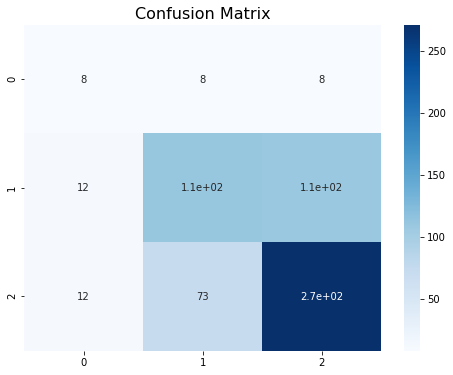

In [ ]:
rf_sentimen_label_case_x = model_predict('rf', X_train_nonsarkasme, y_train_nonsarkasme, X_test_sarkasme, y_test_sarkasme, 'sentimen')